Model for Full Dataset
Root mean squared error = 0.6334
R-square = 0.6645
Slope Coefficients: [-2.59448968 -0.04009349  0.04264417 -0.25269645 -1.99328858 -0.97896716
  0.78576516]
Intercept: 5.4451739970589434


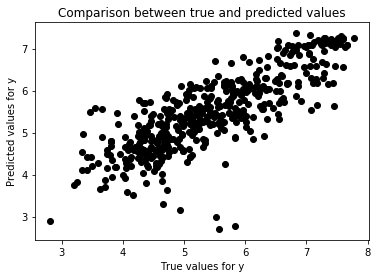

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import copy


data = pd.read_csv("dataComplete.csv")
data.set_index(['Country','Year'], inplace=True, drop=True)
data.dropna(inplace=True)

y = data["Life Ladder"]
data.drop("Life Ladder",axis=1,inplace=True)

# scale data to range from 0 to 1
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

pca = PCA(n_components = 0.85)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

projected = pd.DataFrame(reduced,index=range(1,len(data.index)+1))

X = projected
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create linear regression object
regr = linear_model.LinearRegression()


# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred = regr.predict(X_test)


# Evaluate the results
print("Model for Full Dataset")
print("Root mean squared error = %.4f" %np.sqrt(mean_squared_error(y_test, y_pred)) )
print("R-square = %.4f" % r2_score(y_test, y_pred) )
print('Slope Coefficients:', regr.coef_ )
print('Intercept:', regr.intercept_ )

plt.scatter(y_test, y_pred, color='black')
plt.title('Comparison between true and predicted values')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

In [19]:
from sklearn import datasets, linear_model, cluster

data = pd.read_csv("dataComplete.csv")
data = data[['Country', 'Year', 'Life Ladder']]
data_by_country = data.groupby('Country')

regr = linear_model.LinearRegression()

country_coef = pd.DataFrame(columns=['Country','Coefficient'])
result = pd.DataFrame(columns=['Centroids','R2','RMSE','# of Slope Coef.'])

for x in data_by_country.groups:
    temp = data_by_country.get_group(x)
    regr.fit(pd.Series(range(1,temp.shape[0]+1)).values.reshape(-1,1), temp['Life Ladder'].values.reshape(-1,1))
    country_coef = country_coef.append({'Country':x,'Coefficient':regr.coef_[0][0]},ignore_index=True)

k_means = cluster.KMeans(n_clusters=3, random_state=1, algorithm="full")
k_means.fit(country_coef['Coefficient'].values.reshape(-1,1)) 
clusters = pd.Series(k_means.labels_)
country_coef['Cluster'] = clusters

centroids = pd.DataFrame(k_means.cluster_centers_)[0]

country_by_cluster = country_coef.groupby('Cluster')
groups = [country_by_cluster.get_group(x) for x in country_by_cluster.groups]

print("Groups for Life Ladder Coefficients")
groups

Groups for Life Ladder Coefficients


[           Country  Coefficient  Cluster
 0      Afghanistan    -0.103146        0
 1          Albania    -0.086090        0
 2          Algeria    -0.007200        0
 5          Armenia    -0.020918        0
 6        Australia    -0.006891        0
 ..             ...          ...      ...
 156  United States    -0.039349        0
 159      Venezuela    -0.195608        0
 160        Vietnam    -0.033267        0
 161          Yemen    -0.144931        0
 162         Zambia    -0.039153        0
 
 [77 rows x 3 columns],          Country  Coefficient  Cluster
 3         Angola    -0.580563        1
 13        Belize    -0.494998        1
 81       Lesotho    -1.089310        1
 130      Somalia    -0.430166        1
 134  South Sudan    -0.422877        1
 142        Syria    -0.409547        1,                  Country  Coefficient  Cluster
 4              Argentina     0.023359        2
 8             Azerbaijan     0.073441        2
 9                Bahrain     0.105172        2

Models for Life Ladder Coefficients

Root mean squared error = 0.6354
R-square = 0.7484
Slope Coefficients: [ 2.38348005  0.71362912 -0.77402599 -0.61576467 -0.81814193  0.7533469
  0.58318601]
Intercept: 5.627413951893309


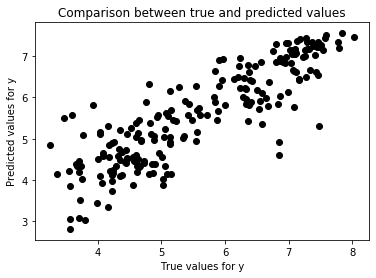

Root mean squared error = 0.6451
R-square = 0.4456
Slope Coefficients: [ 1.939597    1.13166837  0.70198535  0.12750783 -0.66155533 -1.21496393
 -1.26535243]
Intercept: 5.317838242802546


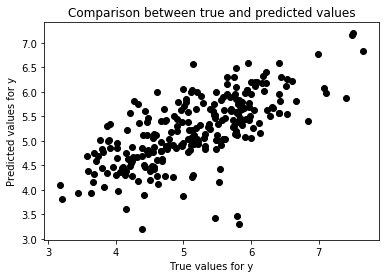

,Centroids,R2,RMSE,# of Slope Coef.
0,-0.058407,0.748351,0.635392,7.0
1,-0.571243,NaN,NaN,NaN
2,0.063550,0.445568,0.645083,7.0


In [20]:
print("Models for Life Ladder Coefficients")
print()

r2 = pd.Series(np.NaN, index=[0,1,2])
rmse = pd.Series(np.NaN, index=[0,1,2])
slopes = pd.Series(np.NaN, index=[0,1,2])

for group in range(3):
    data3 = pd.read_csv("dataComplete.csv")
    x = groups[group]["Country"].unique()
    data3 = data3.loc[data3['Country'].isin(x)]

    if (data3.shape[0]>=100):
    
        data3.set_index(['Country','Year'], inplace=True, drop=True)
        data3.dropna(inplace=True)

        y = data3["Life Ladder"]
        data3.drop("Life Ladder",axis=1,inplace=True)

        scaler = MinMaxScaler()
        data_rescaled = scaler.fit_transform(data3)

        pca = PCA(n_components = 0.85)
        pca.fit(data_rescaled)
        reduced = pca.transform(data_rescaled)
        
        projected = pd.DataFrame(reduced,index=range(1,len(data3.index)+1))

        X = projected
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        # # Create linear regression object
        regr = linear_model.LinearRegression()


        # # Fit regression model to the training set
        regr.fit(X_train, y_train)

        # # Apply model to the test set
        y_pred = regr.predict(X_test)


        # Evaluate the results
        print("Root mean squared error = %.4f" %np.sqrt(mean_squared_error(y_test, y_pred)) )
        print("R-square = %.4f" % r2_score(y_test, y_pred) )
        print('Slope Coefficients:', regr.coef_ )
        print('Intercept:', regr.intercept_ )
        
        # Add results to result df
        r2.loc[group] = r2_score(y_test, y_pred)
        rmse.loc[group] = np.sqrt(mean_squared_error(y_test, y_pred))
        slopes.loc[group] = regr.coef_.shape[0]

        plt.scatter(y_test, y_pred, color='black')
        plt.title('Comparison between true and predicted values')
        plt.xlabel('True values for y')
        plt.ylabel('Predicted values for y')
        plt.show()
        
result['Centroids'] = centroids
result['R2'] = r2
result['RMSE'] = rmse
result['# of Slope Coef.'] = slopes
result

In [22]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, cluster

data = pd.read_csv("dataComplete.csv")
data = data[['Country', 'Year', 'Population']]
data_by_country = data.groupby('Country')

regr = linear_model.LinearRegression()

country_coef = pd.DataFrame(columns=['Country','Population Mean'])
result = pd.DataFrame(columns=['Centroids','R2','RMSE','# of Slope Coef.'])

for x in data_by_country.groups:
    temp = data_by_country.get_group(x)
    country_coef = country_coef.append({'Country':x,'Population Mean':temp['Population'].mean()},ignore_index=True)

k_means = cluster.KMeans(n_clusters=5, random_state=1, algorithm="full")
country_coef = country_coef.dropna()
k_means.fit(country_coef['Population Mean'].values.reshape(-1,1)) 
clusters = pd.Series(k_means.labels_)
country_coef['Cluster'] = clusters

centroids = pd.DataFrame(k_means.cluster_centers_)[0]

country_by_cluster = country_coef.groupby('Cluster')
groups = [country_by_cluster.get_group(x) for x in country_by_cluster.groups]

print("Groups for Population Mean")
print()
groups

Groups for Population Mean



[        Country  Population Mean  Cluster
 1       Albania     2.903061e+06        0
 3        Angola     2.557154e+07        0
 5       Armenia     2.911768e+06        0
 6     Australia     2.261722e+07        0
 7       Austria     8.497829e+06        0
 ..          ...              ...      ...
 158  Uzbekistan     2.961555e+07        0
 159   Venezuela     8.175414e+01        0
 161       Yemen     6.608968e+01        0
 162      Zambia     1.442284e+07        0
 163    Zimbabwe     1.308699e+07        0
 
 [129 rows x 3 columns],    Country  Population Mean  Cluster
 29   China     1.347940e+09        1
 62   India     1.255601e+09        1,         Country  Population Mean  Cluster
 10   Bangladesh     1.502375e+08        2
 19       Brazil     1.980798e+08        2
 71        Japan     1.275882e+08        2
 94       Mexico     1.162224e+08        2
 107     Nigeria     1.648942e+08        2
 111    Pakistan     1.852378e+08        2,             Country  Population Mean  Clus

Models for Population Mean

Root mean squared error = 0.6374
R-square = 0.6783
Slope Coefficients: [ 2.37832921 -0.57737047 -0.03681303  0.8442436   0.29836254 -0.66974099
 -1.55093625]
Intercept: 5.392260742387504


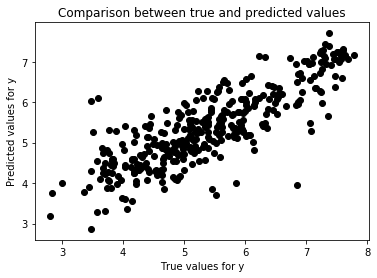

Root mean squared error = 0.4653
R-square = 0.8385
Slope Coefficients: [-1.78962504 -0.4393287  -0.23646468  0.16508098  0.15481039 -0.08532602
 -1.17138697]
Intercept: 5.474930723458873


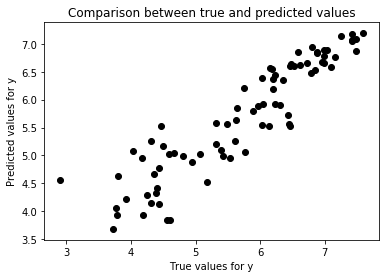

,Centroids,R2,RMSE,# of Slope Coef.
0,7.593629e+06,0.678346,0.637444,7.0
1,1.301771e+09,NaN,NaN,NaN
2,1.570433e+08,NaN,NaN,NaN
3,5.406056e+07,0.838494,0.465320,7.0
4,2.796403e+08,NaN,NaN,NaN


In [23]:
print("Models for Population Mean")
print()

r2 = pd.Series(np.NaN, index=[0,1,2,3,4])
rmse = pd.Series(np.NaN, index=[0,1,2,3,4])
slopes = pd.Series(np.NaN, index=[0,1,2,3,4])

for group in range(5):
    data3 = pd.read_csv("dataComplete.csv")
    x = groups[group]["Country"].unique()
    data3 = data3.loc[data3['Country'].isin(x)]

    if (data3.shape[0]>=100):
    
        data3.set_index(['Country','Year'], inplace=True, drop=True)
        data3.dropna(inplace=True)

        y = data3["Life Ladder"]
        data3.drop("Life Ladder",axis=1,inplace=True)

        #numComponents = 5
        #pca = PCA(n_components=numComponents).fit(data3)

        scaler = MinMaxScaler()
        data_rescaled = scaler.fit_transform(data3)

        pca = PCA(n_components = 0.85)
        pca.fit(data_rescaled)
        reduced = pca.transform(data_rescaled)
        
        projected = pd.DataFrame(reduced,index=range(1,len(data3.index)+1))

        X = projected
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        # # Create linear regression object
        regr = linear_model.LinearRegression()


        # # Fit regression model to the training set
        regr.fit(X_train, y_train)

        # # Apply model to the test set
        y_pred = regr.predict(X_test)


        # Evaluate the results
        print("Root mean squared error = %.4f" %np.sqrt(mean_squared_error(y_test, y_pred)) )
        print("R-square = %.4f" % r2_score(y_test, y_pred) )
        print('Slope Coefficients:', regr.coef_ )
        print('Intercept:', regr.intercept_ )
        
        # Add results to result df
        r2.loc[group] = r2_score(y_test, y_pred)
        rmse.loc[group] = np.sqrt(mean_squared_error(y_test, y_pred))
        slopes.loc[group] = regr.coef_.shape[0]

        plt.scatter(y_test, y_pred, color='black')
        plt.title('Comparison between true and predicted values')
        plt.xlabel('True values for y')
        plt.ylabel('Predicted values for y')
        plt.show()
        
result['Centroids'] = centroids
result['R2'] = r2
result['RMSE'] = rmse
result['# of Slope Coef.'] = slopes
result

In [24]:
data = pd.read_csv("dataComplete.csv")
data = data[['Country', 'Year', 'Life Ladder', 'Delivery Quality']]
data_by_country = data.groupby('Country')

regr = linear_model.LinearRegression()

country_coef = pd.DataFrame(columns=['Country','Coefficient'])
result = pd.DataFrame(columns=['Centroids','R2','RMSE','# of Slope Coef.'])

for x in data_by_country.groups:
    temp = data_by_country.get_group(x)
    country_coef = country_coef.append({'Country':x,'Coefficient':np.corrcoef(temp['Life Ladder'], temp['Delivery Quality'])[0,1]},ignore_index=True)

k_means = cluster.KMeans(n_clusters=5, random_state=1, algorithm="full")
country_coef = country_coef.dropna()
k_means.fit(country_coef['Coefficient'].values.reshape(-1,1)) 
clusters = pd.Series(k_means.labels_)
country_coef['Cluster'] = clusters

centroids = pd.DataFrame(k_means.cluster_centers_)[0]

country_by_cluster = country_coef.groupby('Cluster')
groups = [country_by_cluster.get_group(x) for x in country_by_cluster.groups]

print("Groups for Correlation Between Life Ladder and Delivery Quality")
print()
groups

C:\Users\Elena\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Elena\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Elena\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Groups for Correlation Between Life Ladder and Delivery Quality



[               Country  Coefficient  Cluster
 0          Afghanistan    -0.745883      0.0
 4            Argentina    -0.532831      0.0
 5              Armenia    -0.476552      0.0
 15              Bhutan    -0.780235      0.0
 22             Burundi    -0.945630      0.0
 37              Cyprus     0.187102      0.0
 44         El Salvador     0.167650      0.0
 45             Estonia    -0.578314      0.0
 46            Ethiopia    -0.769745      0.0
 58            Honduras     0.452633      0.0
 76              Kuwait     0.534154      0.0
 89            Malaysia     0.553349      0.0
 91               Malta    -0.579632      0.0
 97          Montenegro     0.098722      0.0
 106              Niger     0.584585      0.0
 115               Peru     0.752372      0.0
 119              Qatar     0.006004      0.0
 120            Romania     0.437138      0.0
 125             Serbia     0.571233      0.0
 126       Sierra Leone     0.077934      0.0
 128           Slovakia    -0.6270

Models for Correlation Between Life Ladder and Delivery Quality

Root mean squared error = 0.5310
R-square = 0.7189
Slope Coefficients: [ 1.86245196 -0.08317724 -0.2158413  -0.8985834   0.58061141 -0.52273041
  0.68739949]
Intercept: 5.450706877617267


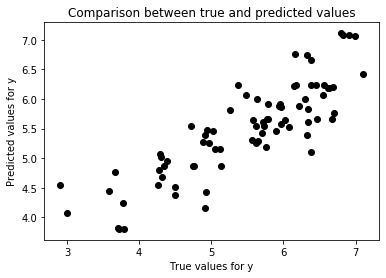

Root mean squared error = 0.6061
R-square = 0.7401
Slope Coefficients: [-2.36530543  0.93592195  0.19999677 -1.38566193  0.70573563 -0.76470663
  0.63759264]
Intercept: 5.452124114455034


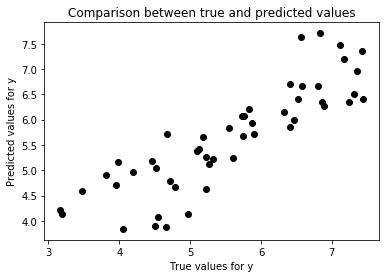

Root mean squared error = 0.5689
R-square = 0.6828
Slope Coefficients: [-2.25766126  0.05366206  0.43530075  0.2838737   0.55350608 -0.62519894
 -0.86193267]
Intercept: 5.5330864556939225


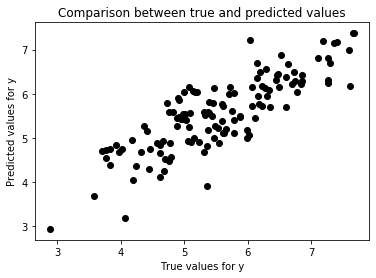

Root mean squared error = 0.6072
R-square = 0.7392
Slope Coefficients: [ 2.02666028  0.49123756 -0.28581852 -0.28966701 -1.26626468  0.18168168
 -1.24654897]
Intercept: 5.296839502097687


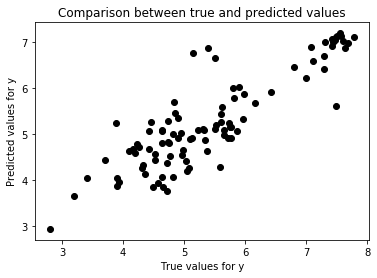

Root mean squared error = 0.6724
R-square = 0.7170
Slope Coefficients: [ 2.25396768  0.32415221 -0.48723898 -0.62026489 -1.04520483 -1.00695966]
Intercept: 5.4930140165605525


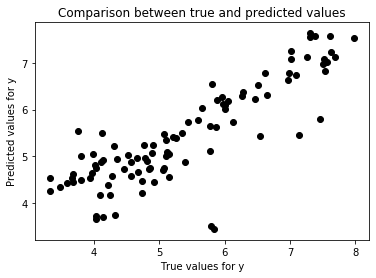

,Centroids,R2,RMSE,# of Slope Coef.
0,-0.640712,0.718889,0.531033,7.0
1,0.782824,0.740056,0.606072,7.0
2,0.168699,0.682776,0.568891,7.0
3,-0.214689,0.739164,0.607185,7.0
4,0.481302,0.716955,0.672450,6.0


In [25]:
print("Models for Correlation Between Life Ladder and Delivery Quality")
print()

r2 = pd.Series(np.NaN, index=[0,1,2,3,4])
rmse = pd.Series(np.NaN, index=[0,1,2,3,4])
slopes = pd.Series(np.NaN, index=[0,1,2,3,4])

for group in range(5):
    data3 = pd.read_csv("dataComplete.csv")
    x = groups[group]["Country"].unique()
    data3 = data3.loc[data3['Country'].isin(x)]

    if (data3.shape[0]>=100):
    
        data3.set_index(['Country','Year'], inplace=True, drop=True)
        data3.dropna(inplace=True)

        y = data3["Life Ladder"]
        data3.drop("Life Ladder",axis=1,inplace=True)

        scaler = MinMaxScaler()
        data_rescaled = scaler.fit_transform(data3)

        pca = PCA(n_components = 0.85)
        pca.fit(data_rescaled)
        reduced = pca.transform(data_rescaled)
        
        projected = pd.DataFrame(reduced,index=range(1,len(data3.index)+1))

        X = projected
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        # # Create linear regression object
        regr = linear_model.LinearRegression()

        # # Fit regression model to the training set
        regr.fit(X_train, y_train)

        # # Apply model to the test set
        y_pred = regr.predict(X_test)


        # Evaluate the results
        print("Root mean squared error = %.4f" %np.sqrt(mean_squared_error(y_test, y_pred)) )
        print("R-square = %.4f" % r2_score(y_test, y_pred) )
        print('Slope Coefficients:', regr.coef_ )
        print('Intercept:', regr.intercept_ )
        
        # Add results to result df
        r2.loc[group] = r2_score(y_test, y_pred)
        rmse.loc[group] = np.sqrt(mean_squared_error(y_test, y_pred))
        slopes.loc[group] = regr.coef_.shape[0]

        plt.scatter(y_test, y_pred, color='black')
        plt.title('Comparison between true and predicted values')
        plt.xlabel('True values for y')
        plt.ylabel('Predicted values for y')
        plt.show()
        
result['Centroids'] = centroids
result['R2'] = r2
result['RMSE'] = rmse
result['# of Slope Coef.'] = slopes
result